# Partial Correlation
## _Author(s): Wai Yuen (Wylliam) Cheng_

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_gene = pd.read_csv("../BE700_human_expression.(1) (1) (1).csv", index_col=0, sep=",")

In [19]:
def par_corr_between(x, y, z):
    assert x.ndim == 1
    assert y.ndim == 1
    assert z.ndim == 1 or z.ndim == 2
    if z.ndim == 1:
        z = np.reshape(z, (-1, 1))
    # solve two linear regression problems Zw = x and Zw = y
    Z = np.hstack([z, np.ones((z.shape[0], 1))])  # bias
    wx = np.linalg.lstsq(Z, x, rcond=None)[0]
    rx = x - Z @ wx # residual
    wy = np.linalg.lstsq(Z, y, rcond=None)[0]
    ry = y - Z @ wy
    # compute the Pearson correlation coefficient between the two residuals
    return np.corrcoef(rx, ry)[0, 1]

def par_corr(data_df):
    n = data_df.shape[1]
    mat = np.empty((n, n))
    np.fill_diagonal(mat, 1)
    for i in range(n):
        for j in range(i + 1, n):
            x = data_df.iloc[:, i].values
            y = data_df.iloc[:, j].values
            z = data_df.iloc[:, [t for t in range(data_df.shape[1]) if t != i and t != j]].values
            corr = par_corr_between(x, y, z)
            mat[i, j] = corr
            mat[j, i] = corr
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

## Partial Correlation Among Top Genes for Diabete Data
#### Grouped by diagnosis

In [34]:
top_100_dt2_gene = list(pd.read_csv("welch_t_test_results_to_d2.csv", index_col=0).head(100).index)

In [27]:
dt2_gene = pd.read_csv("../BE700_human_expression.(1) (1) (1).csv", index_col=0, sep=",")
dt2_gene = dt2_gene.T[top_100_dt2_gene]
dt2_gene

,C17orf77,DBNDD1,ACTRT3,LINC01186,RASSF2,ANLN,EGR3,PLEKHH2,RABL2A///RABL2B,FRAS1,...,FASTKD3,LINC00629,MRPL19,PANK2,IL32,MIR7114///NSMF,LOC102723692,KITLG,MIR6791///GPR108,LINC01141
GSM624925,4.035624,9.150255,6.556123,10.072669,10.007027,6.342970,9.133399,9.172927,9.364175,8.273843,...,11.567528,9.578750,12.542863,8.580447,11.832653,10.365557,9.404077,5.926124,11.596097,9.823049
GSM624926,4.472488,8.211888,5.646739,9.525521,9.414685,8.185004,8.113742,6.556123,8.938863,8.756209,...,11.789574,9.604739,12.569025,8.632268,10.439623,10.195495,9.718362,7.706222,10.187723,9.342075
GSM624927,8.020147,7.452035,7.187847,10.053383,9.772315,7.255027,8.399171,9.067703,8.469492,9.274486,...,11.678116,9.034799,12.432150,8.163398,13.419947,8.288174,8.829406,7.920129,10.968595,9.710290
GSM624928,5.904484,10.405461,6.456149,10.145677,9.339627,7.552110,7.719047,7.179909,8.713437,9.186420,...,11.464597,6.776104,12.963546,8.871597,7.675957,10.344518,9.459841,6.315491,11.465872,9.786106
GSM624929,5.364572,8.071462,7.099085,10.097505,10.097505,5.950188,7.580447,6.402586,8.966771,8.687073,...,11.806429,8.966073,11.808280,7.928370,14.160100,10.461889,9.173677,6.916840,11.079418,9.913338
GSM624930,5.765535,9.053383,6.091700,10.314583,10.021119,8.838790,8.259743,8.881114,6.810688,8.398368,...,12.143734,8.655352,13.119606,8.650334,8.776762,10.499447,5.108524,8.007813,10.854790,9.749534
GSM624931,5.963474,9.747689,6.149747,9.632632,9.699399,6.236472,8.704595,8.322829,8.646100,8.164323,...,11.695359,9.311067,13.222599,7.335390,12.567861,10.218442,8.620586,7.382848,10.519046,9.498051
GSM624932,8.356672,8.308339,8.197217,9.654278,9.191800,6.263201,9.239121,8.168923,8.429889,9.270701,...,11.708006,8.137504,12.372593,8.839834,13.118049,10.034249,8.488242,5.123121,10.655083,9.626074
GSM624933,5.965784,9.601771,7.155830,9.849405,10.296228,6.781360,7.661065,8.347843,8.952444,9.057806,...,11.242579,8.642774,12.184348,8.383704,11.588574,11.129219,9.150001,7.662158,11.189825,10.452035
GSM624934,6.427941,10.268542,6.232661,9.574783,10.126963,8.046182,9.059885,8.272863,8.977748,8.873744,...,11.674810,9.389094,13.111348,8.579693,12.429171,9.985700,9.260920,7.886814,10.780622,7.678072


In [28]:
dt2_parcorr = par_corr(dt2_gene)

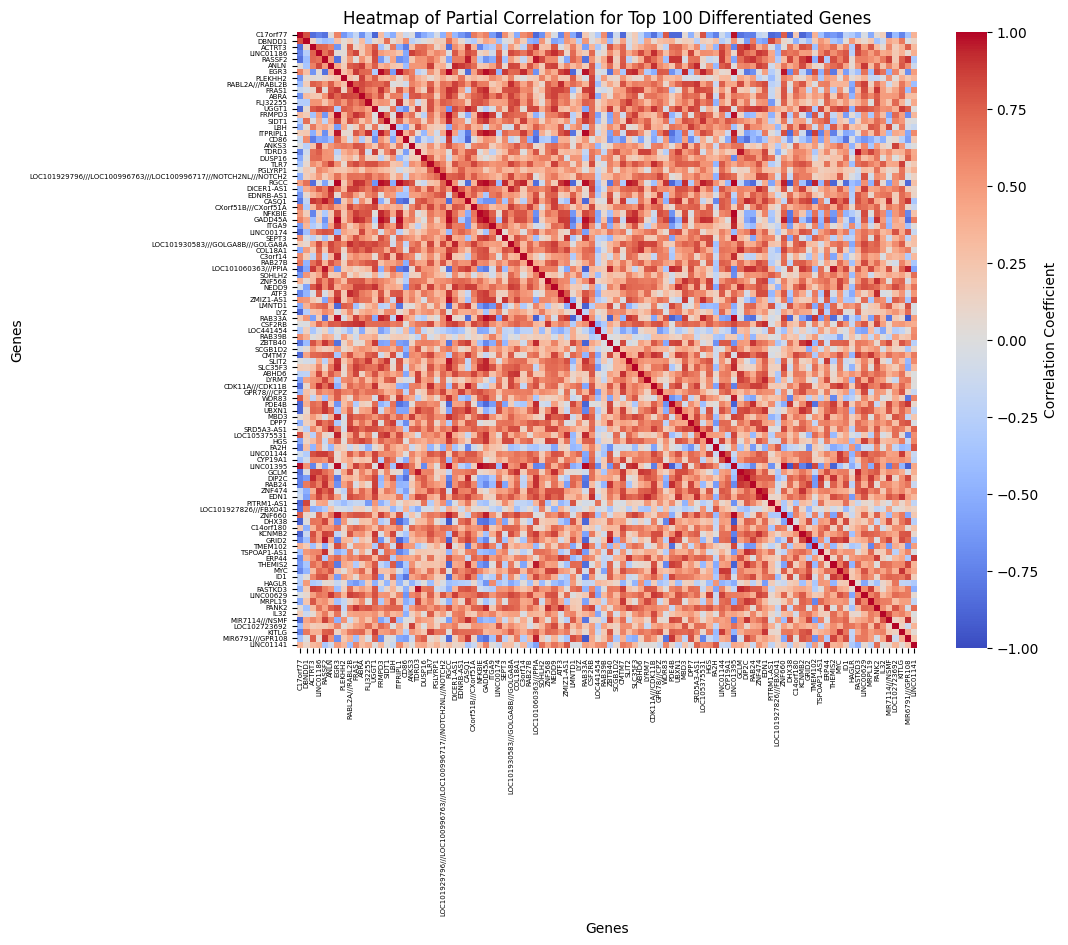

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt2_parcorr, 
            xticklabels=dt2_parcorr.columns, 
            yticklabels=dt2_parcorr.index, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Partial Correlation for Top 100 Differentiated Genes")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

***

## Partial Correlation Among Top Genes for Diabete Data
#### Grouped by A1C

In [30]:
top_100_dt2_gene = list(pd.read_csv("anova_results_to_d2_A1C.csv", index_col=0).head(100).index)

In [31]:
dt2_gene = pd.read_csv("../BE700_human_expression.(1) (1) (1).csv", index_col=0, sep=",")
dt2_gene = dt2_gene.T[top_100_dt2_gene]
dt2_gene

,PLEKHM3,PGLYRP1,GAREM1,EPHX3,MYL12A,LINC01006///C7orf13,DBT,SIDT1,PCNX3,ZNF26,...,KRTAP1-3,C17orf77,ACTRT3,KLHL32,LOC101927451,GAL3ST4,GVINP1,ZNF597,SCGB1D2,ASH1L-AS1
GSM624925,10.359440,6.201634,10.341496,5.663914,10.267932,5.995485,10.970133,9.080818,6.760221,9.125531,...,5.422733,4.035624,6.556123,5.817623,10.619945,10.048487,7.854256,7.166857,8.722808,10.863489
GSM624926,10.230355,7.055282,10.355286,5.894818,10.301355,7.167920,10.910576,9.096188,5.632268,8.948002,...,5.680328,4.472488,5.646739,5.385431,10.256916,10.095924,6.706688,7.543081,10.213590,11.047533
GSM624927,9.557585,7.070389,10.581666,5.997744,10.712298,6.861707,11.245822,8.657497,6.980711,9.383508,...,6.213971,8.020147,7.187847,8.288635,10.386725,10.476746,9.172970,7.880208,7.036723,10.667910
GSM624928,9.840397,7.416164,10.652384,5.629357,10.560478,5.652486,11.093607,9.191059,6.534497,7.591453,...,6.293532,5.904484,6.456149,7.797662,10.264325,10.107086,7.740408,8.618446,9.935607,11.060899
GSM624929,10.298476,6.754888,10.155452,6.405992,10.385878,6.864186,11.052511,8.801547,6.002252,9.292032,...,5.857490,5.364572,7.099085,8.342964,10.328338,9.486232,7.221472,8.389974,8.055825,10.906214
GSM624930,10.136711,6.632268,10.664459,6.876517,10.280484,5.714246,11.600129,8.754554,7.182891,9.670997,...,5.478261,5.765535,6.091700,7.435462,10.343186,9.951868,7.458798,8.747868,9.238882,10.853777
GSM624931,10.062706,6.798310,10.301288,6.414474,10.260819,7.808642,11.325664,9.248876,5.240314,9.519757,...,5.929612,5.963474,6.149747,8.124638,10.272630,10.007167,7.610091,8.194731,6.402586,10.638436
GSM624932,9.675753,6.622052,10.304236,6.341630,10.330404,5.296457,11.298940,9.262565,5.638074,8.959863,...,5.341234,8.356672,8.197217,7.601399,9.895424,9.346735,6.397356,7.029483,9.150509,11.167230
GSM624933,9.912890,6.910493,10.447869,6.442943,10.151961,7.920651,11.017602,8.919459,6.689299,7.986536,...,6.076301,5.965784,7.155830,7.833523,10.139935,10.515207,6.721907,6.857904,10.008709,10.828295
GSM624934,10.297408,5.855491,10.212554,5.501439,10.161341,6.207502,11.155867,9.585714,6.809929,9.595172,...,7.311184,6.427941,6.232661,6.872829,10.162391,10.067838,7.086095,8.815054,7.287251,10.677632


In [32]:
dt2_parcorr = par_corr(dt2_gene)

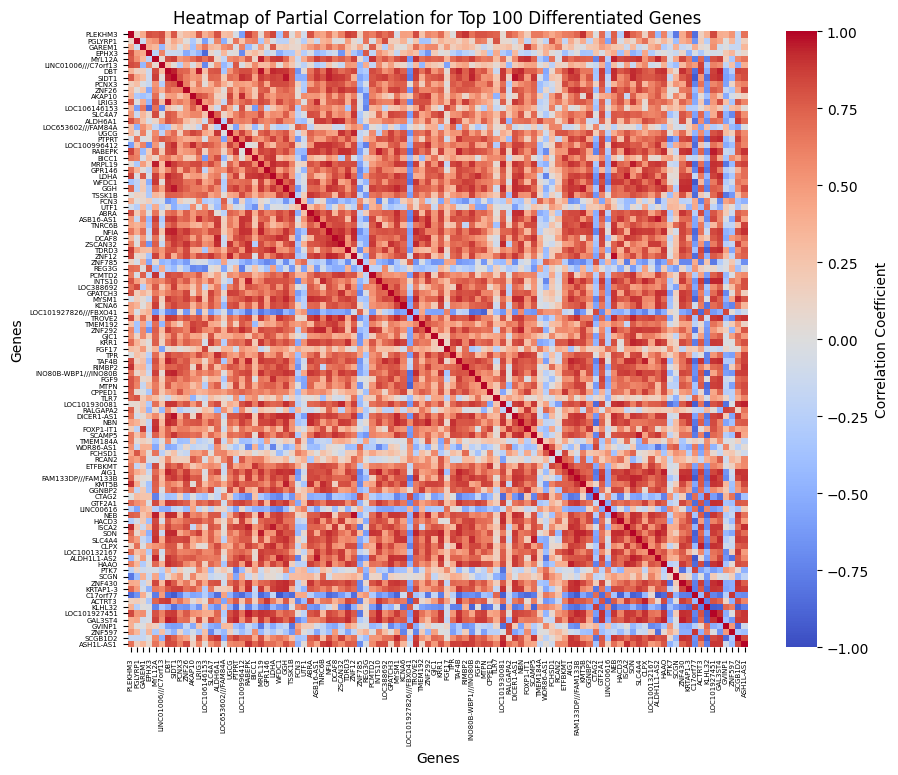

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt2_parcorr, 
            xticklabels=dt2_parcorr.columns, 
            yticklabels=dt2_parcorr.index, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Partial Correlation for Top 100 Differentiated Genes")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

***

## Partial Correlation Among Top Genes for Diabete Data
#### Grouped by Age

In [36]:
top_100_dt2_gene = list(pd.read_csv("welch_t_test_results_to_age_40yo.csv", index_col=0).head(100).index)

In [37]:
dt2_gene = pd.read_csv("../BE700_human_expression.(1) (1) (1).csv", index_col=0, sep=",")
dt2_gene = dt2_gene.T[top_100_dt2_gene]
dt2_gene

,NPY6R,CA4,UNC13C,CMTM2,DEFB123,TCF12,CTBP1,LINC01558,MEST,LINC00959,...,STRADB,SLC12A3,COMMD7,C6orf136,PNN,SLC25A12,GOT1,LOC101927537,LOC101929229,ARFGAP2
GSM624925,12.001516,11.244593,9.132396,10.030667,7.844235,9.447154,12.968623,8.351948,13.123944,10.257859,...,13.822641,8.002252,10.673599,12.988490,11.252606,14.002600,15.188832,10.712871,9.526108,9.560590
GSM624926,12.607480,10.892671,8.623340,8.604739,8.231701,9.362996,13.320267,7.604111,11.368397,11.297031,...,14.534722,9.030391,10.150387,12.738830,10.950483,14.310082,15.964909,11.086468,9.253138,8.219599
GSM624927,12.411498,10.806130,9.489014,8.518456,5.678072,9.703660,11.949867,7.859166,11.253020,10.647818,...,13.801870,8.498251,10.043075,12.179441,10.893605,14.056194,15.339098,10.488141,9.798634,9.680239
GSM624928,10.632190,9.446209,10.091764,7.288174,5.984134,9.674652,12.429658,7.238844,10.687113,10.729111,...,13.858758,8.994353,11.212139,12.687985,11.295539,14.159896,15.263126,10.112440,9.941781,9.023701
GSM624929,11.809200,10.515019,10.373091,7.480588,7.782015,9.449145,12.841391,7.454094,10.637168,10.506208,...,13.324870,9.230741,10.955960,12.212508,11.640516,13.674879,14.374584,10.408542,9.671187,9.778380
GSM624930,13.186571,10.766860,8.262632,9.499647,4.968091,9.508868,12.888999,7.553052,11.127092,10.983564,...,13.789391,8.771489,9.723676,12.539236,11.771077,13.951970,15.362642,10.596749,10.141852,8.221836
GSM624931,11.497678,10.177118,10.176618,6.620586,6.472488,9.576329,12.267963,7.567951,10.536442,10.239837,...,13.576295,6.145677,10.983726,11.936685,11.778118,13.924748,15.163264,10.318430,9.743488,8.596842
GSM624932,12.161125,10.242220,9.573567,8.799929,8.648897,9.623680,12.836398,7.637829,11.145868,10.892770,...,14.185371,8.143638,9.825442,11.854822,11.574641,14.020149,14.920069,10.282162,9.440662,8.145533
GSM624933,11.684127,10.794348,9.715278,9.240076,9.037547,9.612961,12.663832,8.110992,11.089649,11.100268,...,13.581106,6.736064,11.011076,12.865478,11.024170,13.996176,15.604293,10.956376,10.001549,8.961855
GSM624934,10.444958,10.319097,10.375572,6.989820,5.013462,9.768600,12.427991,7.617341,10.826787,10.701826,...,14.145327,6.861707,10.852999,11.881899,11.389739,13.776760,15.097036,10.013741,10.065820,8.687020


In [38]:
dt2_parcorr = par_corr(dt2_gene)

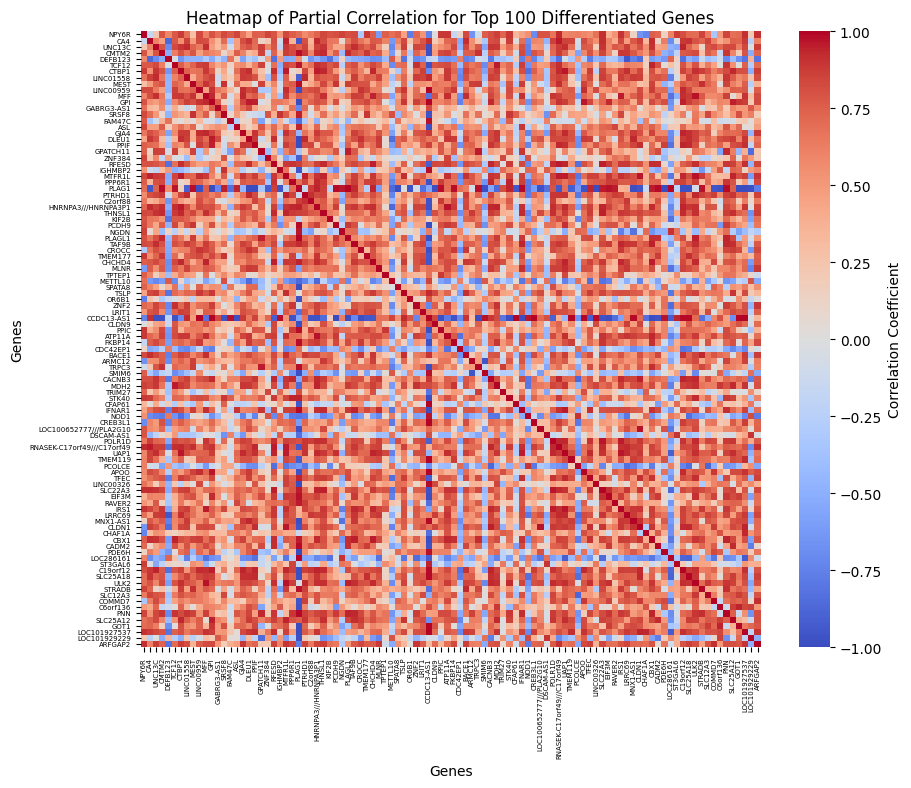

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt2_parcorr, 
            xticklabels=dt2_parcorr.columns, 
            yticklabels=dt2_parcorr.index, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Partial Correlation for Top 100 Differentiated Genes")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

***